<a href="https://colab.research.google.com/github/NadiraNipa/INSE6220-Project/blob/main/Final_Project_INSE6220_Winter_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,f1_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

#Load Dataset and Read Dataset Info

In [ ]:
data_df= pd.read_csv('/content/drive/MyDrive/INSE6220 Project/kidney_disease.csv')

In [ ]:
data_df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
data_df.describe().T

count        mean         std     min     25%     50%     75%      max
id    400.0  199.500000  115.614301   0.000   99.75  199.50  299.25  399.000
age   391.0   51.483376   17.169714   2.000   42.00   55.00   64.50   90.000
bp    388.0   76.469072   13.683637  50.000   70.00   80.00   80.00  180.000
sg    353.0    1.017408    0.005717   1.005    1.01    1.02    1.02    1.025
al    354.0    1.016949    1.352679   0.000    0.00    0.00    2.00    5.000
su    351.0    0.450142    1.099191   0.000    0.00    0.00    0.00    5.000
bgr   356.0  148.036517   79.281714  22.000   99.00  121.00  163.00  490.000
bu    381.0   57.425722   50.503006   1.500   27.00   42.00   66.00  391.000
sc    383.0    3.072454    5.741126   0.400    0.90    1.30    2.80   76.000
sod   313.0  137.528754   10.408752   4.500  135.00  138.00  142.00  163.000
pot   312.0    4.627244    3.193904   2.500    3.80    4.40    4.90   47.000
hemo  348.0   12.526437    2.912587   3.100   10.30   12.65   15.00   17.800

In [ ]:
data_df.shape

(400, 26)

In [ ]:
data_df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

#Data Cleaning

In [ ]:
data_df.drop('id', axis = 1, inplace = True)

In [ ]:
#Transform Column Name
data_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
data_df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   NaN   
2                  31                    7500                   NaN   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   

   hypertension  diabetes_mellitus coronary_artery_disease appetite  \
0           yes                yes                      no     good   
1            no                 no                      no     good   
2            no                yes                      no     poor   
3           yes                 no                      no     poor   
4            no                 no                      no     good   

  peda_edema aanemia class  
0         no      no   ckd  
1         no      no   ckd  
2         no     yes   ckd  
3        yes     yes   ckd  
4         no      no   ckd  

[5 rows x 25 columns]

In [ ]:
#Analyze categorical columns
data_df['packed_cell_volume'] = pd.to_numeric(data_df['packed_cell_volume'], errors='coerce')
data_df['white_blood_cell_count'] = pd.to_numeric(data_df['white_blood_cell_count'], errors='coerce')
data_df['red_blood_cell_count'] = pd.to_numeric(data_df['red_blood_cell_count'], errors='coerce')

In [ ]:
cat_col=[col for col in data_df.columns if data_df[col].dtype=='object']
for col in cat_col:
    print('{} has {} values '.format(col,data_df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values 


pus_cell has ['normal' 'abnormal' nan] values 


pus_cell_clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


hypertension has ['yes' 'no' nan] values 


diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary_artery_disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


peda_edema has ['no' 'yes' nan] values 


aanemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [ ]:
data_df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data_df['coronary_artery_disease'] = data_df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

data_df['class'] = data_df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

data_df['class'] = data_df['class'].replace(to_replace = 'notckd', value = 'not ckd')


for col in cat_col:
    print('{} has {} values  '.format(col, data_df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values  


pus_cell has ['normal' 'abnormal' nan] values  


pus_cell_clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


hypertension has ['yes' 'no' nan] values  


diabetes_mellitus has ['yes' 'no' nan] values  


coronary_artery_disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


peda_edema has ['no' 'yes' nan] values  


aanemia has ['no' 'yes' nan] values  


class has ['ckd' 'not ckd'] values  




In [ ]:
data_df['class'] = data_df['class'].map({'ckd': 0, 'not ckd': 1})
data_df['class'] = pd.to_numeric(data_df['class'], errors='coerce')
cat_cols = [col for col in data_df.columns if data_df[col].dtype == 'object']
for col in cat_cols:
    print(f"{col} has {data_df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [ ]:
cat_cols = [col for col in data_df.columns if data_df[col].dtype == 'object']
num_cols = [col for col in data_df.columns if data_df[col].dtype != 'object']
num_cols = num_cols[:-1]
print(cat_cols)
print(num_cols)

['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']
['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [ ]:
#replace nan with mode for categorical values and mean for numerical
data_df1 = data_df

def mean_value_imputation(feature):
    mean = data_df[feature].mean()
    data_df[feature] = data_df[feature].fillna(mean)


for col in num_cols:
    mean_value_imputation(col)

In [ ]:
def impute_mode(feature):
    mode = data_df[feature].mode()[0]
    data_df[feature] = data_df[feature].fillna(mode)

for col in cat_cols:
    impute_mode(col)

In [ ]:
data_df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent            121.000000  ...   
1    normal      notpresent  notpresent            148.036517  ...   
2    normal      notpresent  notpresent            423.000000  ...   
3  abnormal         present  notpresent            117.000000  ...   
4    normal      notpresent  notpresent            106.000000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0              5.200000   
1                38.0                  6000.0              4.707435   
2                31.0                  7500.0              4.707435   
3                32.0                  6700.0              3.900000   
4                35.0                  7300.0              4.600000   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   peda_edema aanemia class  
0          no      no     0  
1          no      no     0  
2          no     yes     0  
3         yes     yes     0  
4          no      no     0  

[5 rows x 25 columns]

In [ ]:
#Total percentage of NULL value in each column
(data_df.isnull().sum() / data_df.shape[0] * 100.00).round(2)

age                        0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
red_blood_cells            0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
serum_creatinine           0.0
sodium                     0.0
potassium                  0.0
haemoglobin                0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
peda_edema                 0.0
aanemia                    0.0
class                      0.0
dtype: float64

#Exploratory Data Analysis (EDA)

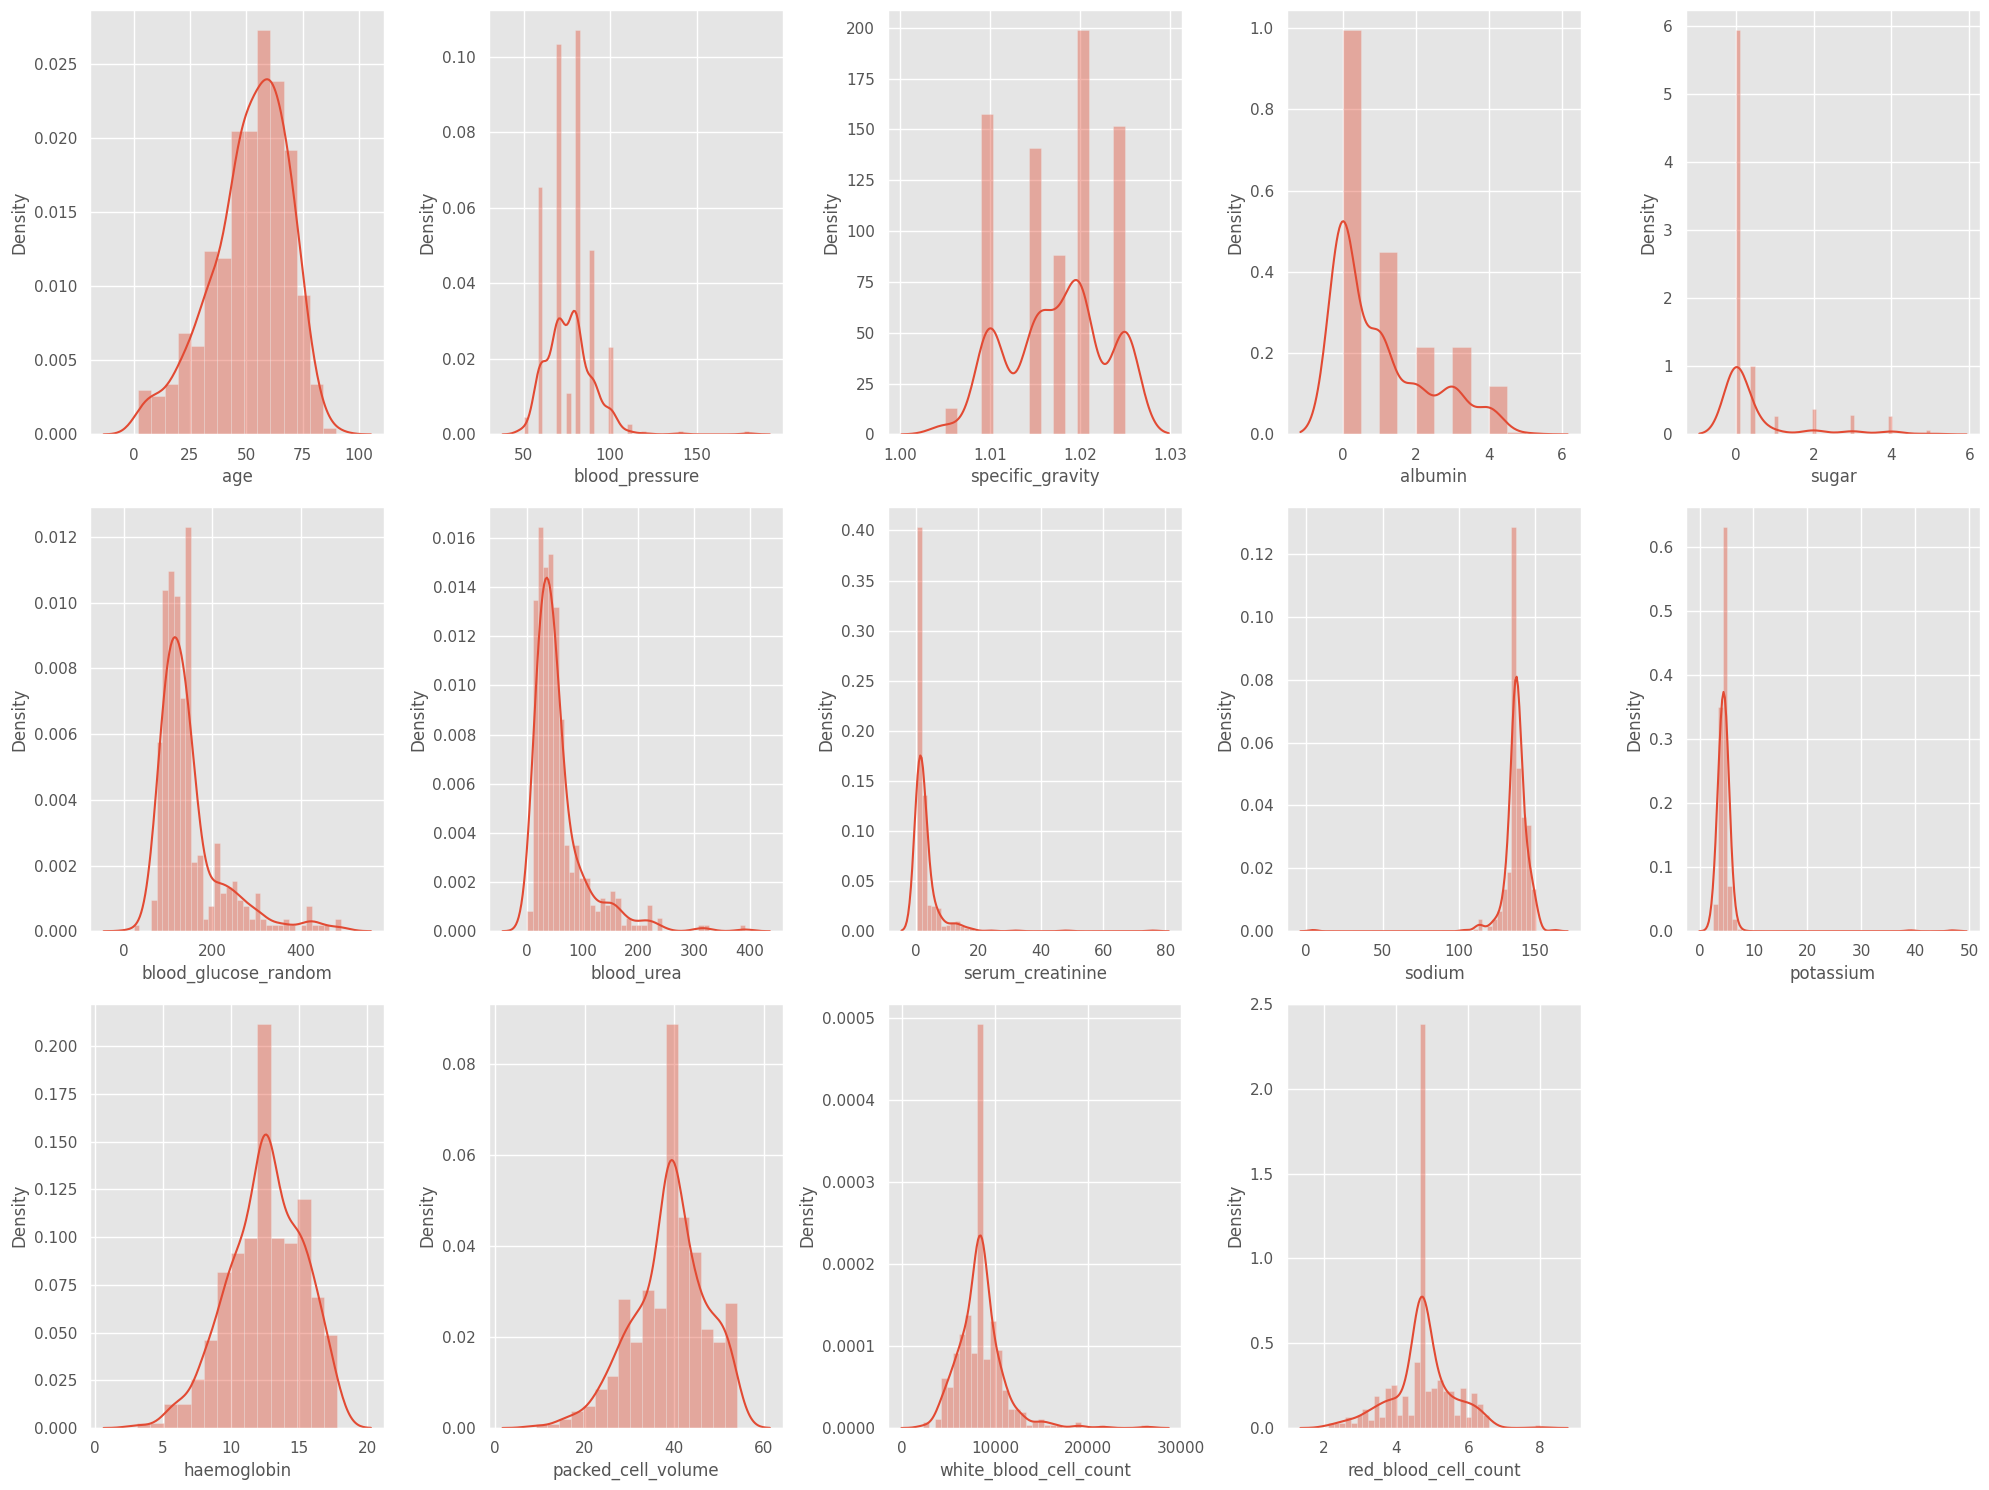

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

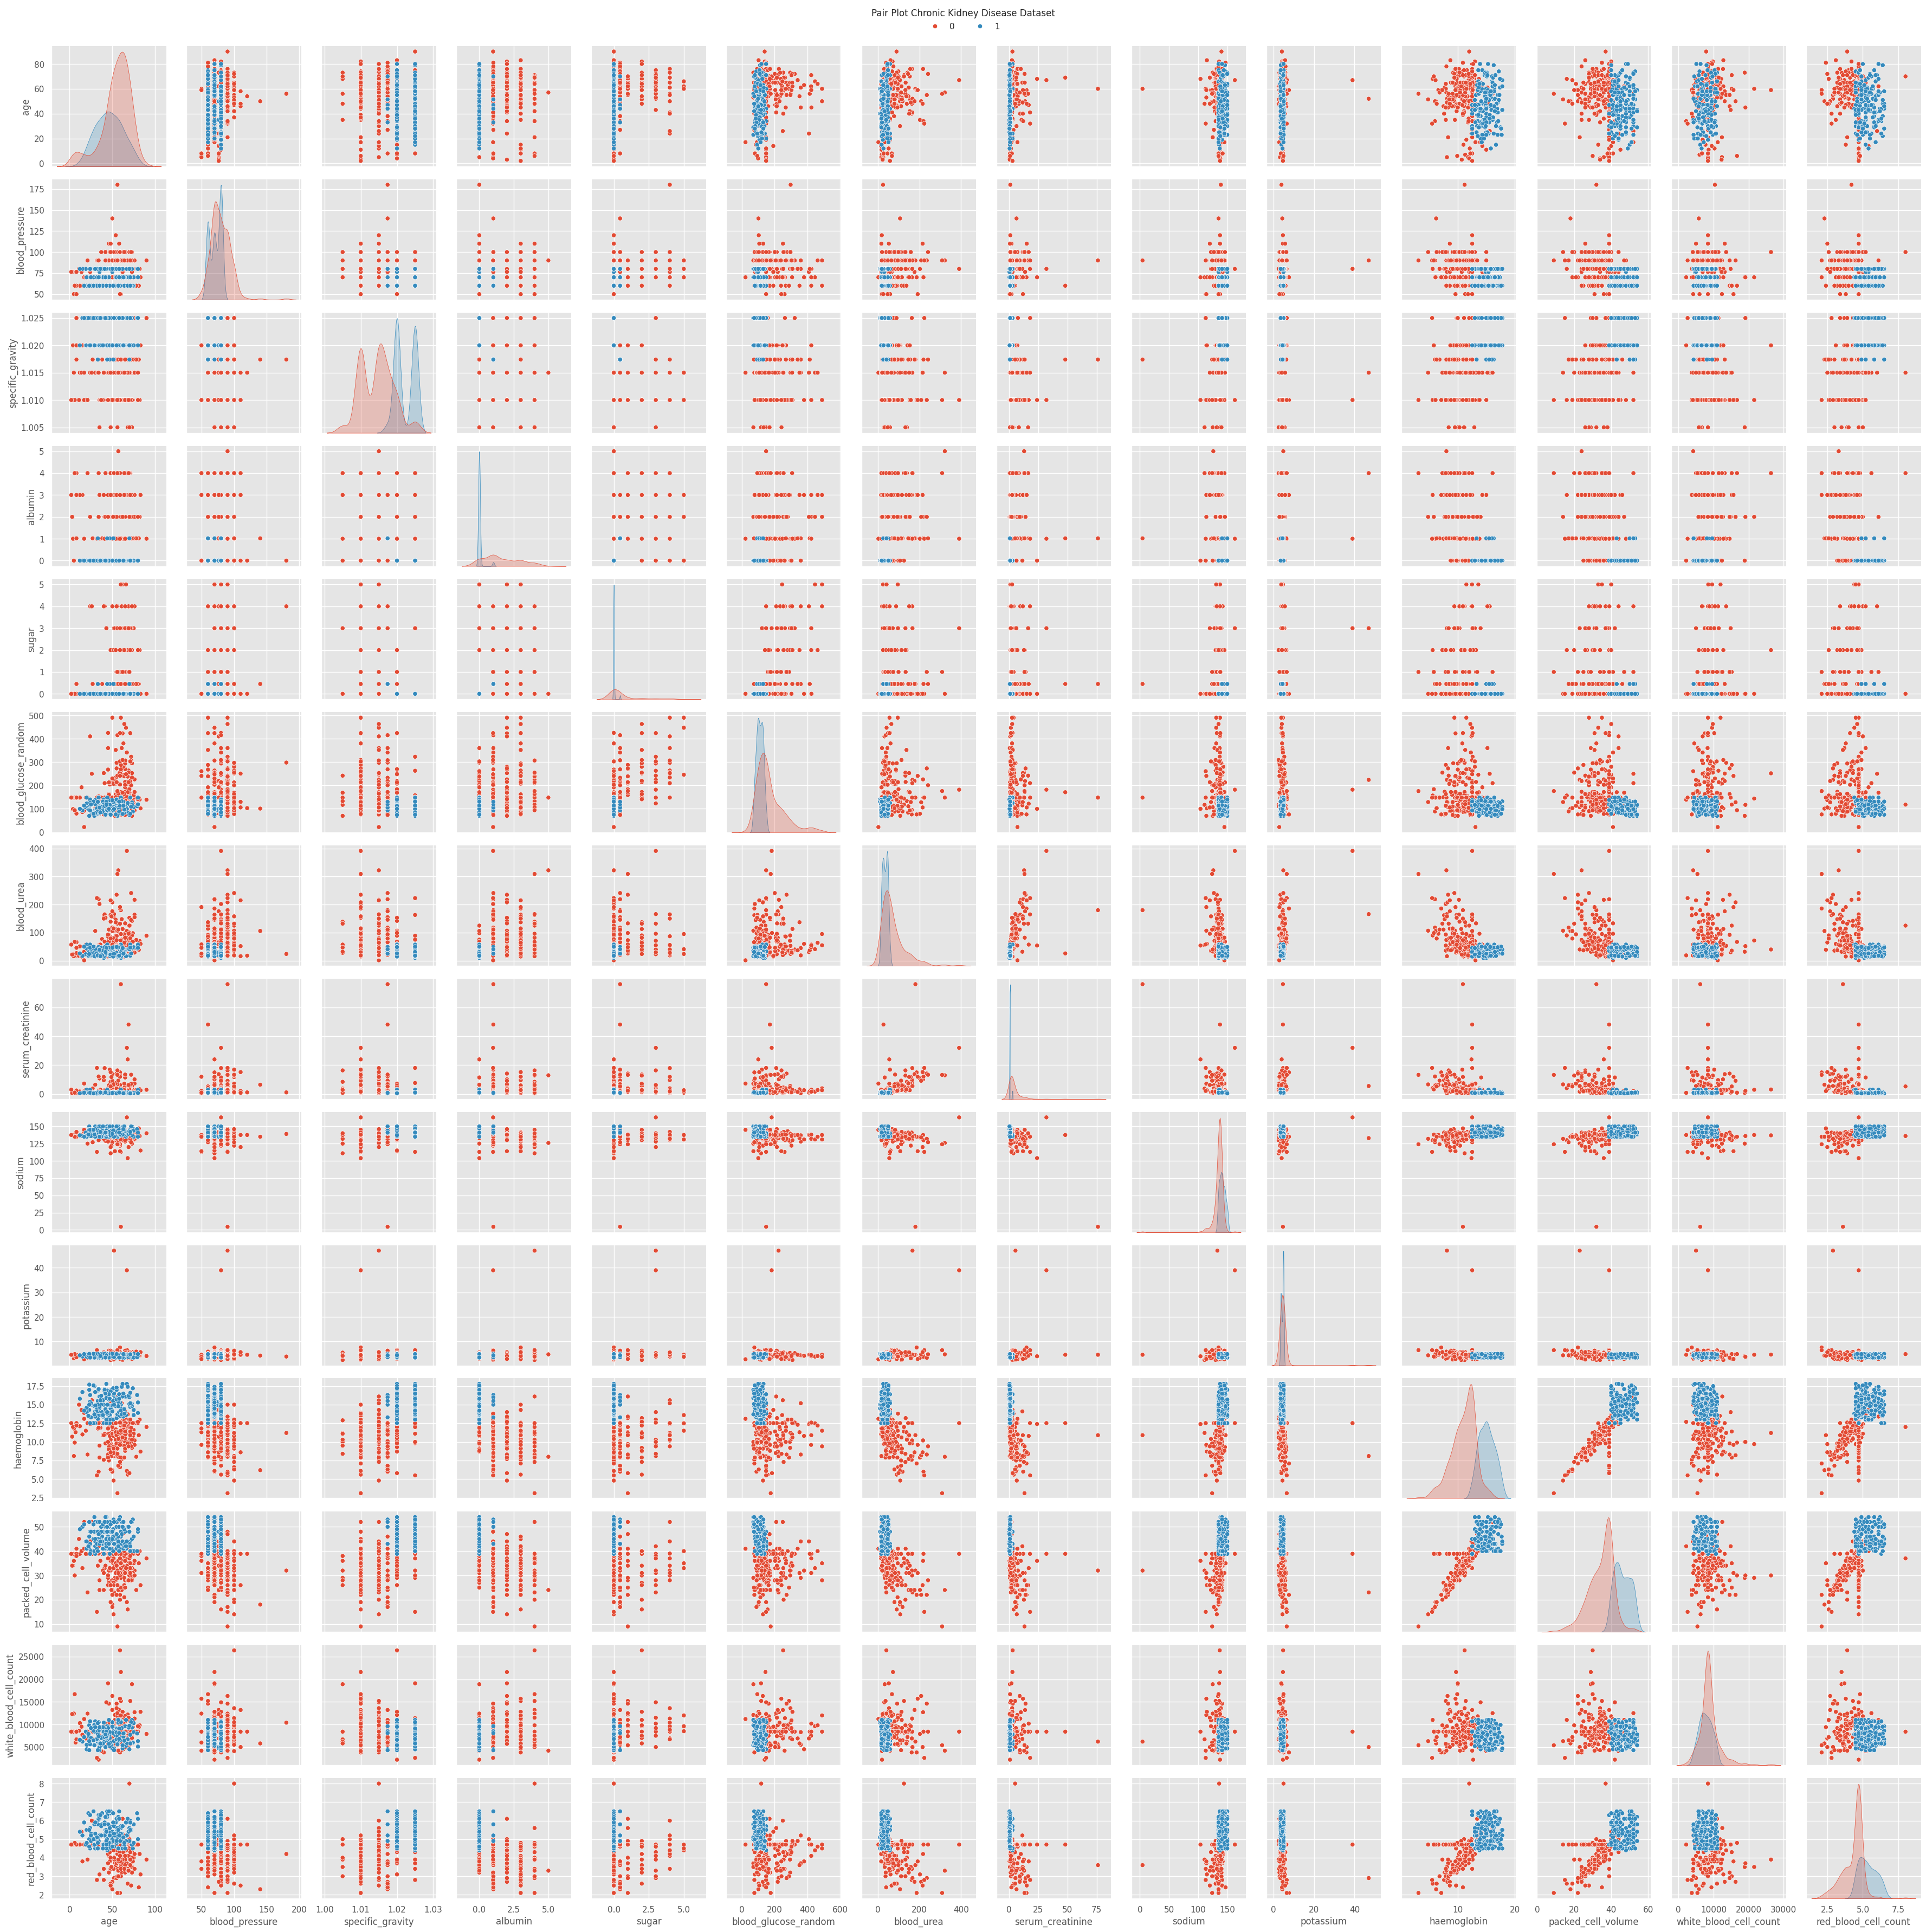

In [ ]:
ax = sns.pairplot(data_df, hue='class')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title="Pair Plot Chronic Kidney Disease Dataset", frameon=False)

plt.tight_layout()
plt.show()

In [ ]:
#Check for outliers
num_cols1 = num_cols[:-2]
fig = px.box(data_df[num_cols1], y=num_cols1)
fig.show()

In [ ]:
fig = px.box(data_df['white_blood_cell_count'], y='white_blood_cell_count')
fig.show()

In [ ]:
fig = px.box(data_df['red_blood_cell_count'], y='red_blood_cell_count')
fig.show()

In [ ]:
import plotly.graph_objects as go
df_px = data_df[num_cols]
fig = px.imshow(df_px.corr())
fig.show()

In [ ]:
df_px.corr()

age  blood_pressure  specific_gravity   albumin  \
age                     1.000000        0.148004         -0.180570  0.114764   
blood_pressure          0.148004        1.000000         -0.182463  0.146593   
specific_gravity       -0.180570       -0.182463          1.000000 -0.466698   
albumin                 0.114764        0.146593         -0.466698  1.000000   
sugar                   0.207857        0.200784         -0.287993  0.268070   
blood_glucose_random    0.214410        0.149100         -0.326339  0.326400   
blood_urea              0.187544        0.183970         -0.278568  0.405778   
serum_creatinine        0.127316        0.144359         -0.213513  0.230479   
sodium                 -0.085949       -0.103220          0.242841 -0.271316   
potassium               0.050148        0.066648         -0.061821  0.114427   
haemoglobin            -0.175380       -0.279535          0.531755 -0.549697   
packed_cell_volume     -0.211805       -0.292714          0.528437 -0.527242   
white_blood_cell_count  0.100061        0.026067         -0.201311  0.200443   
red_blood_cell_count   -0.201051       -0.220822          0.466976 -0.454886   

                           sugar  blood_glucose_random  blood_urea  \
age                     0.207857              0.214410    0.187544   
blood_pressure          0.200784              0.149100    0.183970   
specific_gravity       -0.287993             -0.326339   -0.278568   
albumin                 0.268070              0.326400    0.405778   
sugar                   1.000000              0.639186    0.152186   
blood_glucose_random    0.639186              1.000000    0.127489   
blood_urea              0.152186              0.127489    1.000000   
serum_creatinine        0.130122              0.082242    0.581222   
sodium                 -0.073715             -0.154393   -0.307360   
potassium               0.181015              0.056695    0.336979   
haemoglobin            -0.191518             -0.269149   -0.540641   
packed_cell_volume     -0.202573             -0.267580   -0.525982   
white_blood_cell_count  0.153274              0.121371    0.041510   
red_blood_cell_count   -0.182278             -0.222568   -0.465930   

                        serum_creatinine    sodium  potassium  haemoglobin  \
age                             0.127316 -0.085949   0.050148    -0.175380   
blood_pressure                  0.144359 -0.103220   0.066648    -0.279535   
specific_gravity               -0.213513  0.242841  -0.061821     0.531755   
albumin                         0.230479 -0.271316   0.114427    -0.549697   
sugar                           0.130122 -0.073715   0.181015    -0.191518   
blood_glucose_random            0.082242 -0.154393   0.056695    -0.269149   
blood_urea                      0.581222 -0.307360   0.336979    -0.540641   
serum_creatinine                1.000000 -0.624491   0.205347    -0.342079   
sodium                         -0.624491  1.000000   0.067449     0.333614   
potassium                       0.205347  0.067449   1.000000    -0.100606   
haemoglobin                    -0.342079  0.333614  -0.100606     1.000000   
packed_cell_volume             -0.341853  0.346817  -0.123264     0.854962   
white_blood_cell_count         -0.005420  0.006334  -0.074048    -0.153818   
red_blood_cell_count           -0.323146  0.316956  -0.120456     0.682257   

                        packed_cell_volume  white_blood_cell_count  \
age                              -0.211805                0.100061   
blood_pressure                   -0.292714                0.026067   
specific_gravity                  0.528437               -0.201311   
albumin                          -0.527242                0.200443   
sugar                            -0.202573                0.153274   
blood_glucose_random             -0.267580                0.121371   
blood_urea                       -0.525982                0.041510   
serum_creatinine                 -0.341853    

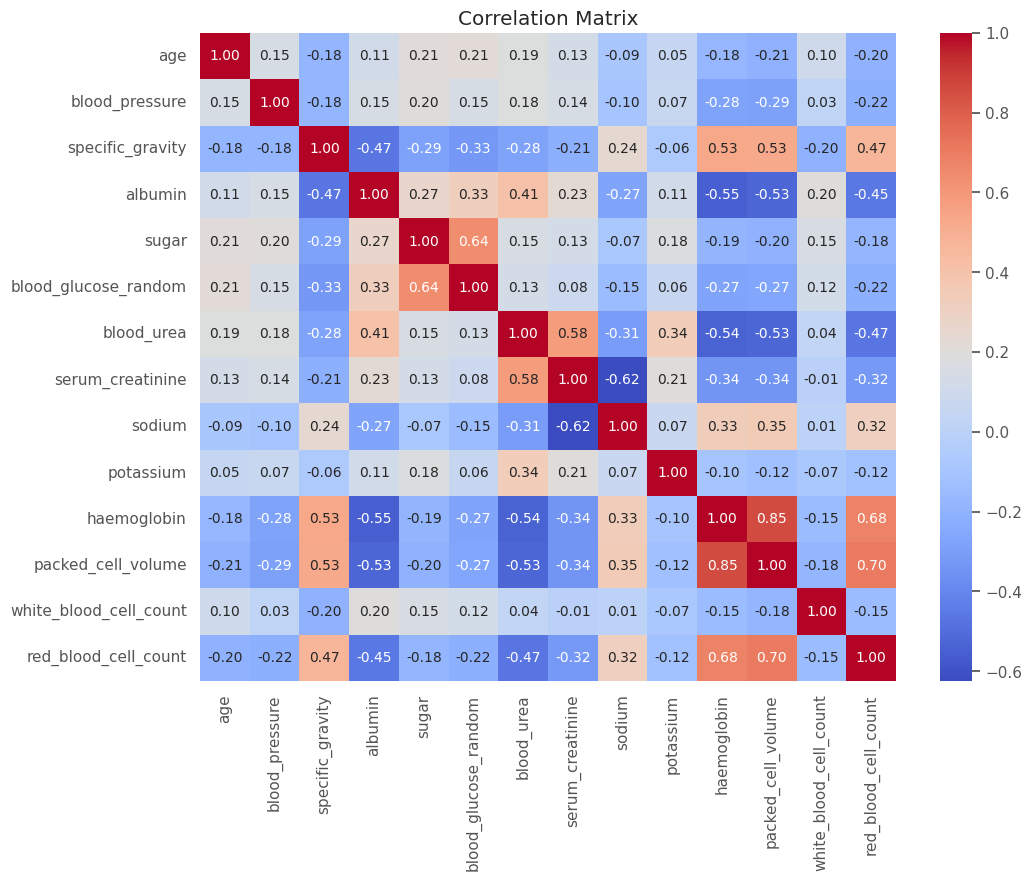

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation dataframe
correlation_matrix = df_px.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_px = data_df[['class', 'red_blood_cell_count', 'white_blood_cell_count', 'specific_gravity', 'packed_cell_volume']]
fig = px.scatter_matrix(df_px,
    dimensions = ['red_blood_cell_count', 'white_blood_cell_count', 'specific_gravity', 'packed_cell_volume'],
    color="class")
fig.show()

In [ ]:
#Deal with outliers
def IQR_outliers(col):

    Q1 = np.percentile(data_df[col], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(data_df[col], 75,
                       interpolation = 'midpoint')

    per_95 = np.percentile(data_df[col], 95,
                       interpolation = 'midpoint')

    IQR = Q3 - Q1

    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    data_df[col] = np.where(data_df[col] > upper, per_95, data_df[col])
    data_df[col] = np.where(data_df[col] < lower, lower, data_df[col])

    return data_df



for col in num_cols:
    data_df = IQR_outliers(col)

In [ ]:
#Check Outliers
num_cols1 = num_cols[:-2]
fig = px.box(data_df[num_cols1], y=num_cols1)
fig.show()

In [ ]:
fig = px.box(data_df['white_blood_cell_count'], y='white_blood_cell_count')
fig.show()

In [ ]:
fig = px.box(data_df['red_blood_cell_count'], y='red_blood_cell_count')
fig.show()

In [ ]:
#Use LabelEncoder for categorical values
for col in cat_cols:
    print(f"{col} has {data_df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    data_df[col] = le.fit_transform(data_df[col])

In [ ]:
data_df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0            1.0200      1.0    0.0                1   
1   9.0            55.0            1.0200      4.0    0.0                1   
2  62.0            80.0            1.0100      2.0    3.0                1   
3  48.0            70.0            1.0075      4.0    0.0                1   
4  51.0            80.0            1.0100      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0            121.000000  ...   
1         1                0         0            148.036517  ...   
2         1                0         0            303.000000  ...   
3         0                1         0            117.000000  ...   
4         1                0         0            106.000000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0              5.200000   
1                38.0                  6000.0              4.707435   
2                31.0                  7500.0              4.707435   
3                32.0                  6700.0              3.900000   
4                35.0                  7300.0              4.600000   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   peda_edema  aanemia  class  
0           0        0      0  
1           0        0      0  
2           0        1      0  
3           1        1      0  
4           0        0      0  

[5 rows x 25 columns]

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

#Spliting the dataset

In [ ]:
ind_col = [col for col in data_df.columns if col != 'class']
dep_col = 'class'

X = data_df[ind_col]
y = data_df[dep_col]

X_test = data_df[ind_col]
y_test = data_df[dep_col]

In [ ]:
print(X.shape)
print(X_test.shape)

(400, 24)
(400, 24)


#Implementing PCA

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



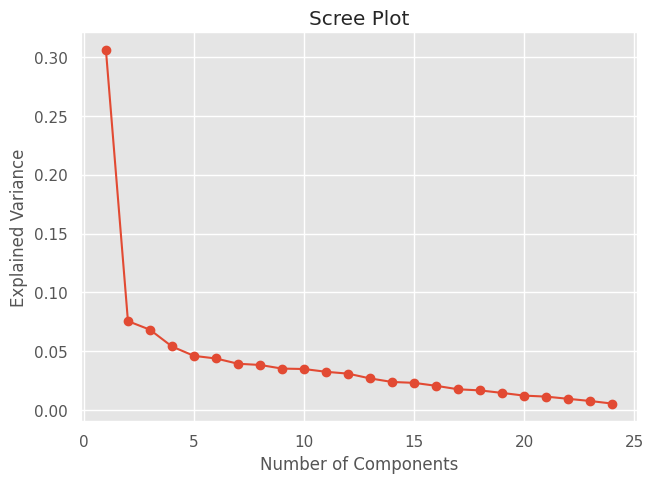

In [ ]:
from sklearn.decomposition import PCA

# Generate scree plot
pca = PCA()
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot scree plot
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")
plt.show()



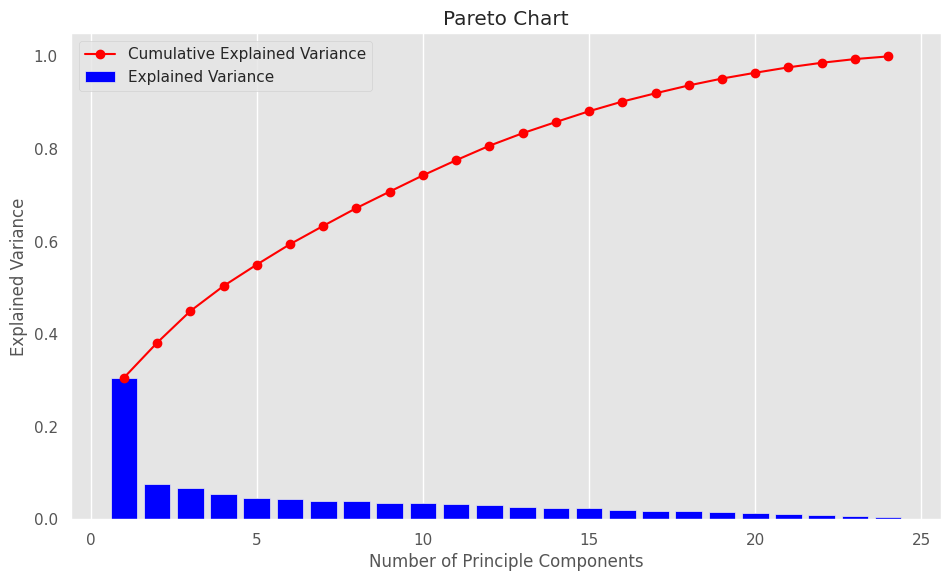

In [ ]:
from sklearn.decomposition import PCA

# Generate scree plot
pca = PCA()
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot Pareto chart
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='blue', label='Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, color='red', marker='o', label='Cumulative Explained Variance')
plt.xlabel('Number of Principle Components')
plt.ylabel('Explained Variance')
plt.title('Pareto Chart')
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.DataFrame(y_train)
final_pca_df = pca_df
final_pca_df['target'] = y_train

In [ ]:
eigenvalues = pca.explained_variance_

# Eigenvectors
eigenvectors = pca.components_

# Each row in 'eigenvectors' corresponds to a principal component (eigenvector)
# 'eigenvalues' contain the corresponding eigenvalues for each eigenvector/component

print("Eigenvalues:", eigenvalues)
print("Eigenvectors\n:", eigenvectors)

Eigenvalues: [7.35962425 1.82406803]
Eigenvectors
: [[ 0.14376862  0.13157135 -0.23264184  0.26422602  0.17486018 -0.12299245
  -0.21702138  0.16408105  0.11664982  0.19568595  0.23228421  0.23241526
  -0.21611653  0.06656257 -0.30576194 -0.3031357   0.04207388 -0.2680582
   0.26835994  0.24006339  0.13915487  0.18892953  0.18129976  0.17540062]
 [ 0.31967347  0.08173854 -0.05714694 -0.05307467  0.4309378   0.10138273
   0.19159604 -0.11038081 -0.10879987  0.41507134 -0.16571411 -0.21120241
   0.09045363  0.02216206  0.13983379  0.12299347  0.19034958  0.05873691
   0.16486184  0.35890753  0.21014054 -0.12738287 -0.13735833 -0.25630695]]


In [ ]:
eigenvectors.shape

(2, 24)

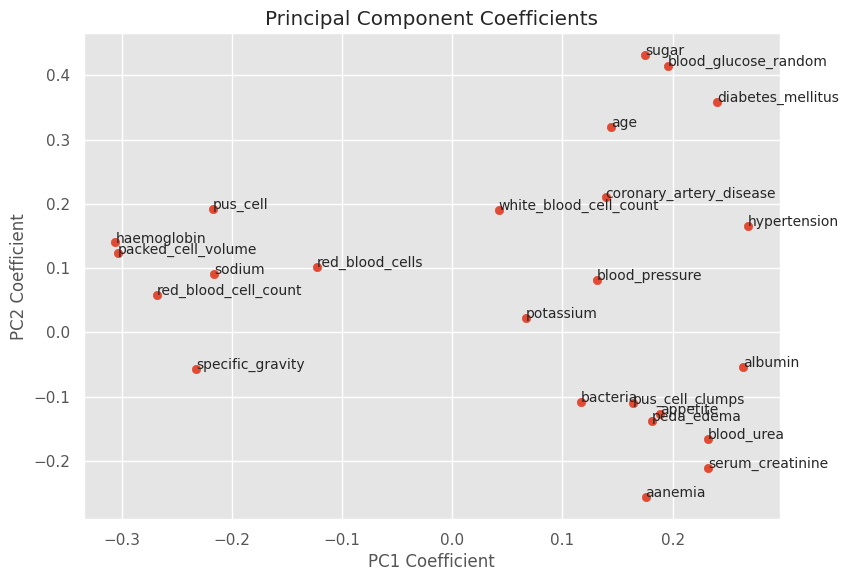

In [ ]:
# Get feature names
feature_names = X_train.columns

plt.figure(figsize=(8, 6))

# Plot eigenvectors
plt.scatter(eigenvectors[0], eigenvectors[1])

# Add feature labels
for i, feature in enumerate(feature_names):
    plt.text(eigenvectors[0, i], eigenvectors[1, i], feature, fontsize=10)

plt.xlabel('PC1 Coefficient')
plt.ylabel('PC2 Coefficient')
plt.title('Principal Component Coefficients')
plt.grid(True)
plt.show()

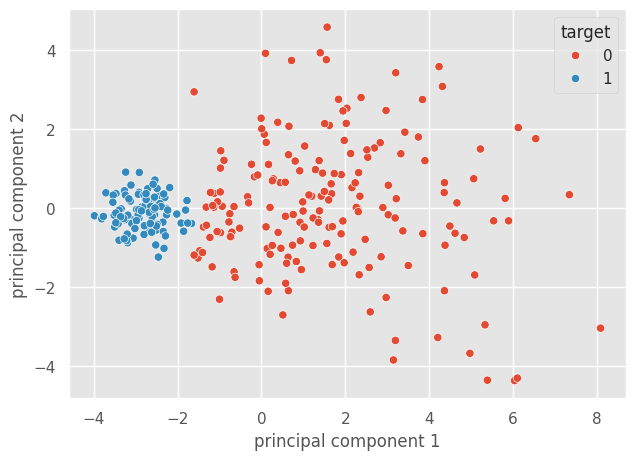

In [ ]:
ax = sns.scatterplot(x =final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1],
hue = 'target',
data=final_pca_df,
legend=True)
plt.show()

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(280, 24)
(120, 24)


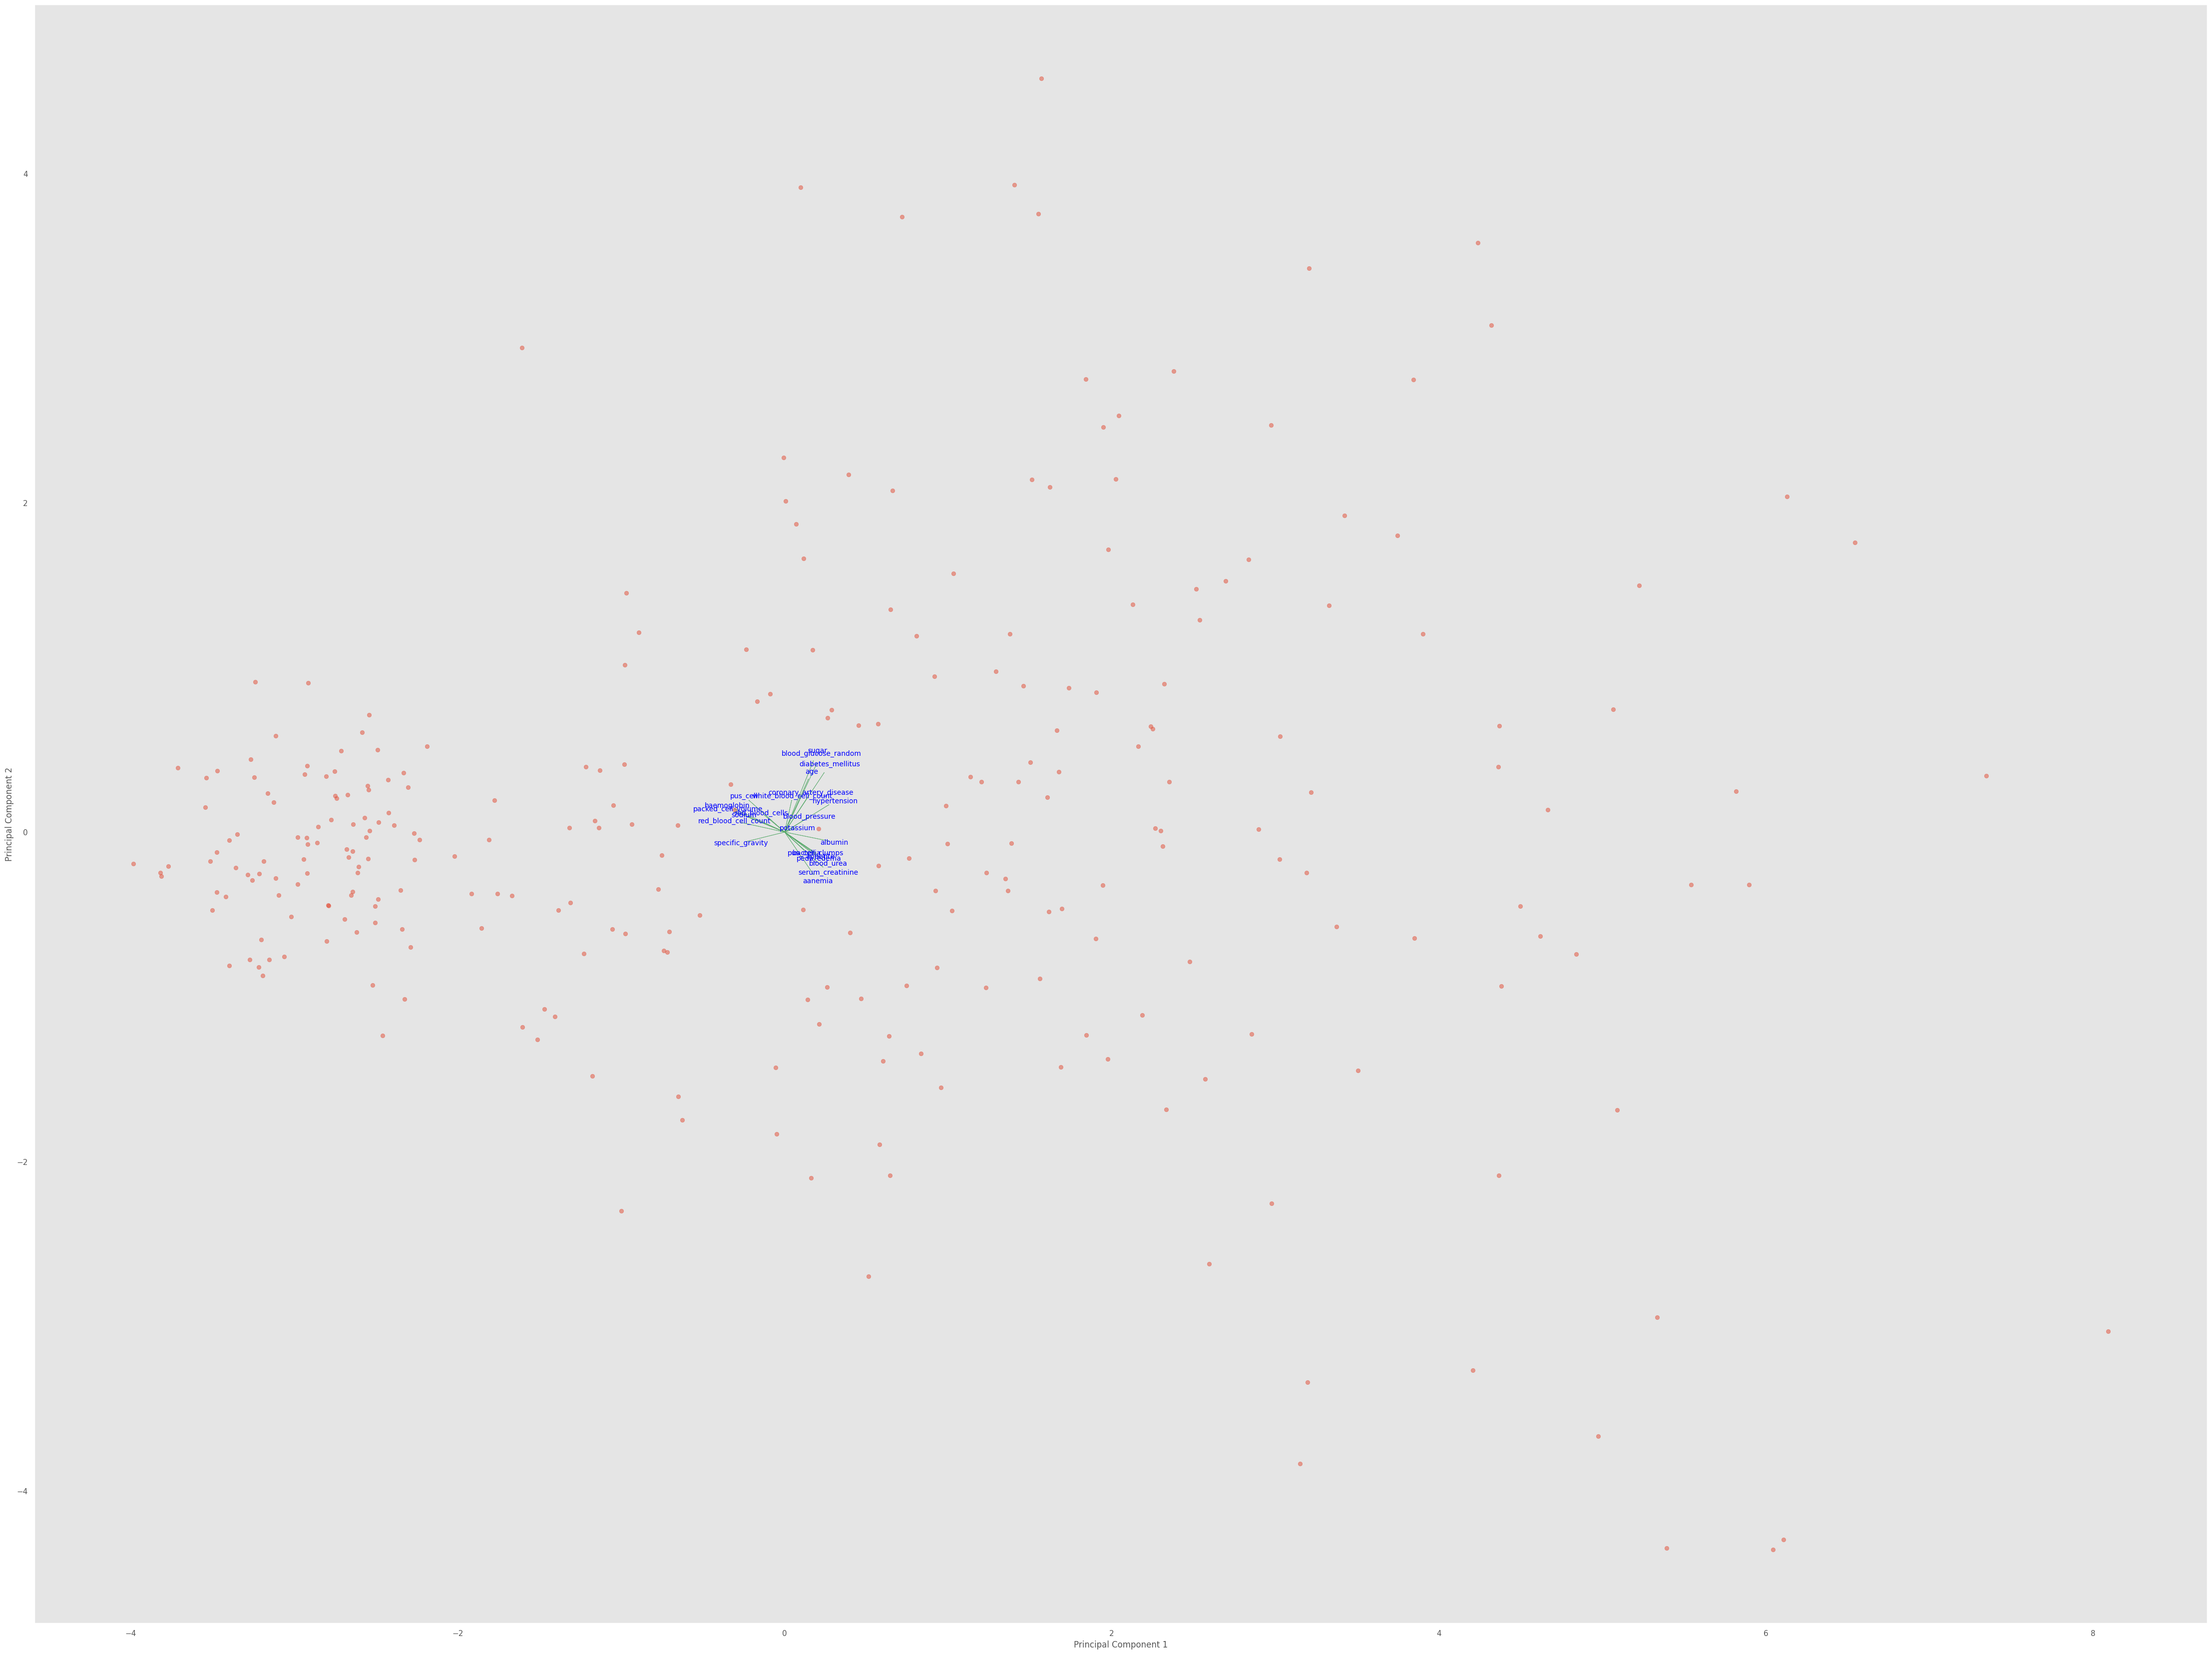

In [ ]:
# Plot Biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(50,40))
    plt.scatter(score[:,0], score[:,1], alpha=0.5)
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='g', alpha=0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='pink', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='blue', ha='center', va='center')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()

# Call the function
biplot(principalComponents[:,0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)
plt.show()


#Implementing Machine Learing Models on PCA Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score,f1_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
X_test_principalComponents = pca.transform(X_test_scaled)
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),

}

for model_name, model in models.items():
  model.fit(principalComponents, y_train)
  # Make predictions on the test set
  y_pred = model.predict(X_test_principalComponents)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f'{model_name} Accuracy: {accuracy:.2f}')

  # Generate a classification report
  print(f'{model_name} Classification Report:')
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  print(f'{model_name} Confusion Matrix:')
  print(cm)

  print('-' * 60)



Random Forest Accuracy: 0.99
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Random Forest Confusion Matrix:
[[71  1]
 [ 0 48]]
------------------------------------------------------------
Logistic Regression Accuracy: 0.99
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Logistic Regression Confusion Matrix:
[[71  1]
 [ 0 48]]
---------------------------------

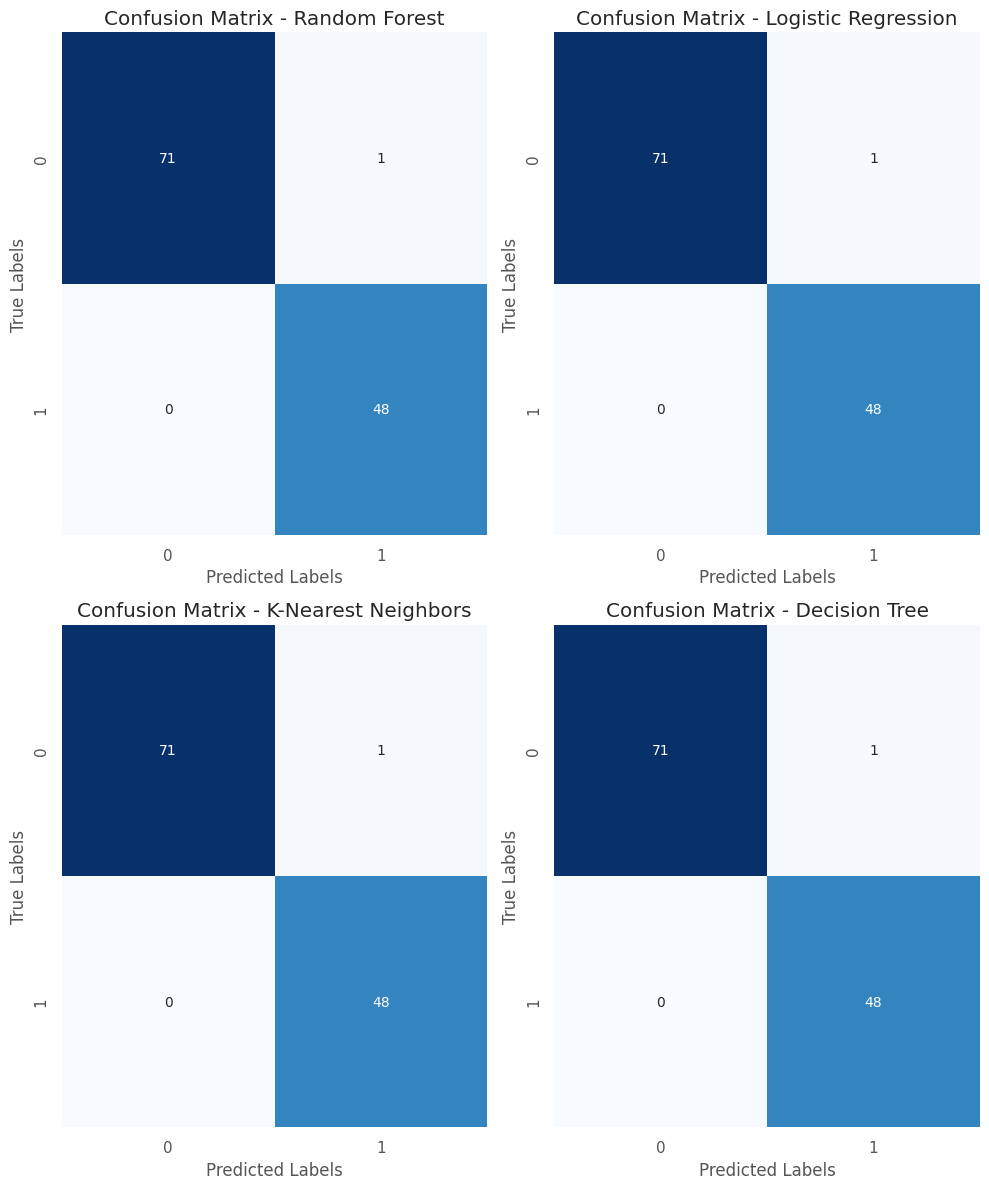

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize a dictionary to store confusion matrices
confusion_matrices = {}

# Iterate over each model
for model_name, model in models.items():
    # Train the model
    model.fit(principalComponents, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_principalComponents)

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Store the confusion matrix in the dictionary
    confusion_matrices[model_name] = cm

# Plot all confusion matrices
plt.figure(figsize=(10, 12))
for i, (model_name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()


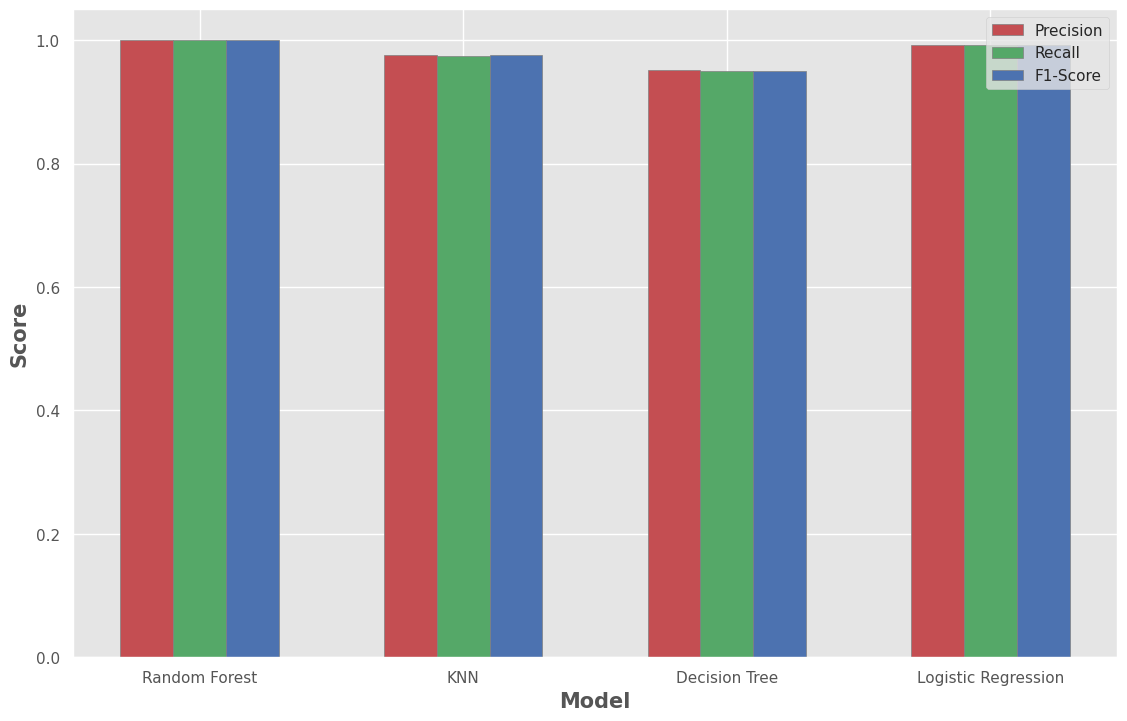

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize dictionaries to store metrics
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Store metrics in dictionaries
    accuracy_dict[model_name] = accuracy
    precision_dict[model_name] = precision
    recall_dict[model_name] = recall
    f1_dict[model_name] = f1

# Set width of bar
barWidth = 0.20
fig, ax = plt.subplots(figsize=(12, 8))

# Set data for precision, recall, and F1-score for each model
data_precision = [precision_dict['Random Forest'], precision_dict['K-Nearest Neighbors'], precision_dict['Decision Tree'], precision_dict['Logistic Regression']]
data_recall = [recall_dict['Random Forest'], recall_dict['K-Nearest Neighbors'], recall_dict['Decision Tree'], recall_dict['Logistic Regression']]
data_f1 = [f1_dict['Random Forest'], f1_dict['K-Nearest Neighbors'], f1_dict['Decision Tree'], f1_dict['Logistic Regression']]

# Set position of bar on X axis
br1 = np.arange(len(data_precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, data_precision, color='r', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(br2, data_recall, color='g', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(br3, data_f1, color='b', width=barWidth, edgecolor='grey', label='F1-Score')

# Adding Xticks
plt.xlabel('Model', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(data_precision))], ['Random Forest', 'KNN', 'Decision Tree', 'Logistic Regression'])

plt.legend()
plt.show()


In [ ]:
# Print accuracy of each model
for model_name, accuracy in accuracy_dict.items():
    print(f'{model_name} Accuracy: {accuracy:.2f}')

Random Forest Accuracy: 1.00
Logistic Regression Accuracy: 0.99
K-Nearest Neighbors Accuracy: 0.97
Decision Tree Accuracy: 0.95


In [ ]:
# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': list(accuracy_dict.values()),
    'Precision': list(precision_dict.values()),
    'Recall': list(recall_dict.values()),
    'F1-Score': list(f1_dict.values())
})

# Print the DataFrame
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  1.000000   1.000000  1.000000  1.000000
1  Logistic Regression  0.991667   0.991837  0.991667  0.991680
2  K-Nearest Neighbors  0.975000   0.976471  0.975000  0.975113
3        Decision Tree  0.950000   0.950857  0.950000  0.950158


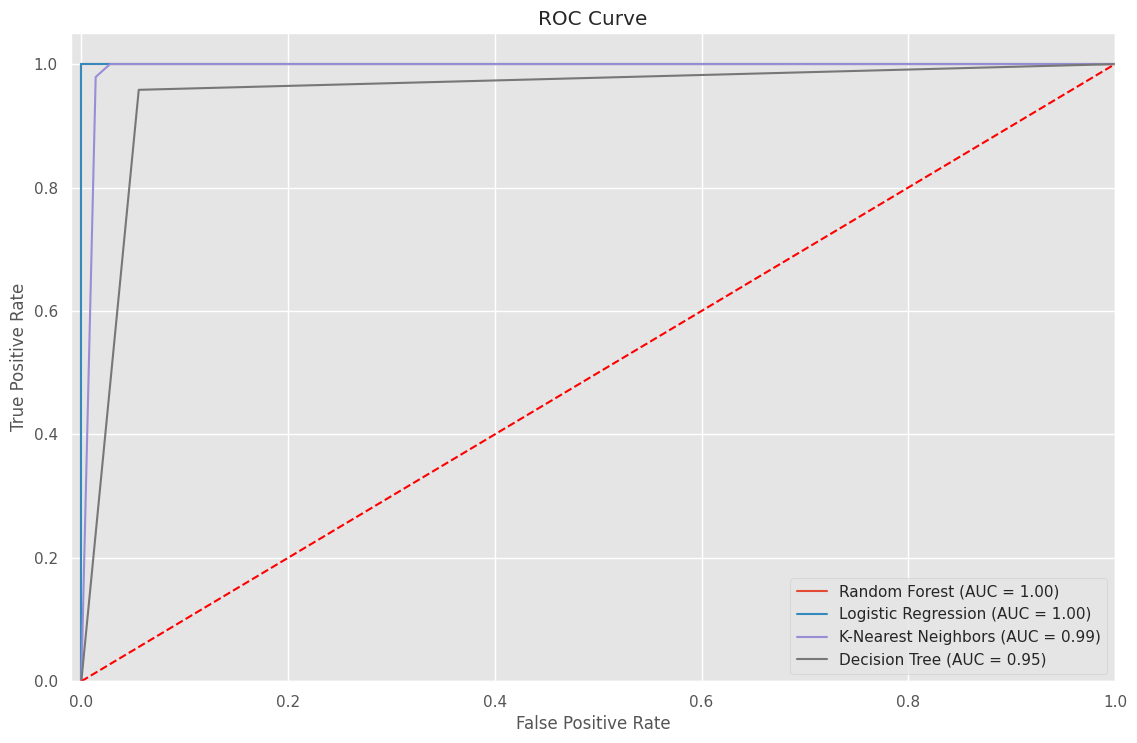

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 8))

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


#Implementing Machine Learning Models on Original Data

In [ ]:
for model_name, model in models.items():
  model.fit(X_train, y_train)
  # Make predictions on the test set
  y_pred_orig = model.predict(X_test)

  # Evaluate the model
  accuracy_orig = accuracy_score(y_test, y_pred_orig)
  print(f'{model_name} Accuracy: {accuracy_orig:.2f}')

  # Generate a classification report
  print(f'{model_name} Classification Report:')
  print(classification_report(y_test, y_pred_orig))

  cm = confusion_matrix(y_test, y_pred_orig)
  print(f'{model_name} Confusion Matrix:')
  print(cm)

  print('-' * 60)

Random Forest Accuracy: 0.97
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

Random Forest Confusion Matrix:
[[72  0]
 [ 3 45]]
------------------------------------------------------------
Logistic Regression Accuracy: 0.94
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.94      0.92      0.93        48

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

Logistic Regression Confusion Matrix:
[[69  3]
 [ 4 44]]
---------------------------------

In [ ]:
# Print accuracy of each model
for model_name, accuracy_orig in accuracy_dict.items():
    print(f'{model_name} Accuracy Original: {accuracy_orig:.2f}')

Random Forest Accuracy Original: 0.99
Logistic Regression Accuracy Original: 0.99
K-Nearest Neighbors Accuracy Original: 0.97
Decision Tree Accuracy Original: 0.94


In [ ]:
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy Original': list(accuracy_dict.values()),
    'Precision': list(precision_dict.values()),
    'Recall': list(recall_dict.values()),
    'F1-Score': list(f1_dict.values())
})

# Print the DataFrame
print(metrics_df)

                 Model  Accuracy Original  Precision    Recall  F1-Score
0        Random Forest           0.991667   0.991837  0.991667  0.991680
1  Logistic Regression           0.991667   0.991837  0.991667  0.991680
2  K-Nearest Neighbors           0.975000   0.976471  0.975000  0.975113
3        Decision Tree           0.941667   0.943393  0.941667  0.941930


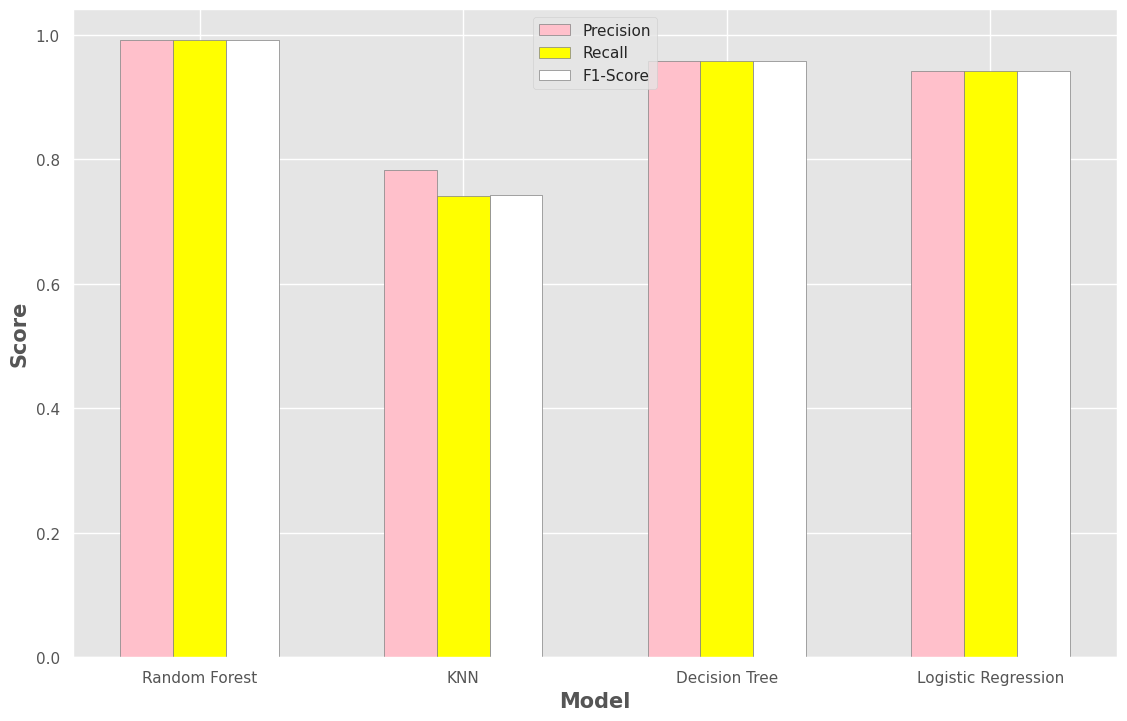

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize dictionaries to store metrics
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Store metrics in dictionaries
    accuracy_dict[model_name] = accuracy
    precision_dict[model_name] = precision
    recall_dict[model_name] = recall
    f1_dict[model_name] = f1

# Set width of bar
barWidth = 0.20
fig, ax = plt.subplots(figsize=(12, 8))

# Set data for precision, recall, and F1-score for each model
data_precision = [precision_dict['Random Forest'], precision_dict['K-Nearest Neighbors'], precision_dict['Decision Tree'], precision_dict['Logistic Regression']]
data_recall = [recall_dict['Random Forest'], recall_dict['K-Nearest Neighbors'], recall_dict['Decision Tree'], recall_dict['Logistic Regression']]
data_f1 = [f1_dict['Random Forest'], f1_dict['K-Nearest Neighbors'], f1_dict['Decision Tree'], f1_dict['Logistic Regression']]

# Set position of bar on X axis
br1 = np.arange(len(data_precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, data_precision, color='pink', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(br2, data_recall, color='yellow', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(br3, data_f1, color='white', width=barWidth, edgecolor='grey', label='F1-Score')

# Adding Xticks
plt.xlabel('Model', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(data_precision))], ['Random Forest', 'KNN', 'Decision Tree', 'Logistic Regression'])

plt.legend()
plt.show()


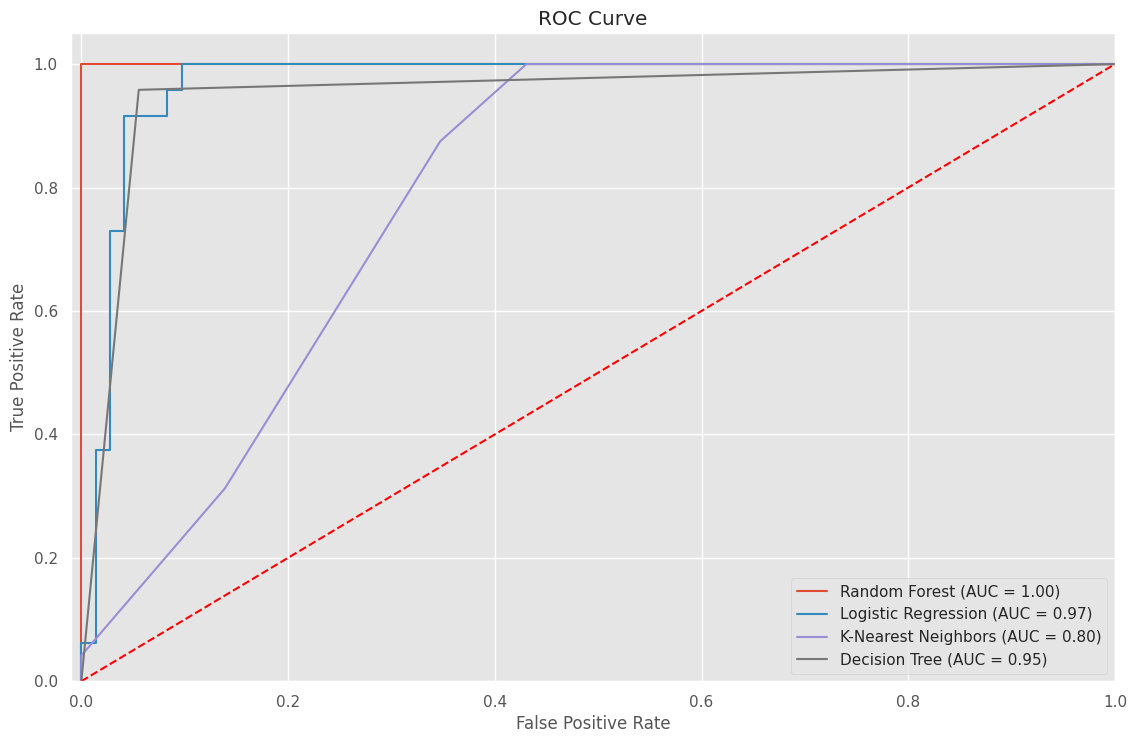

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 8))

# Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
